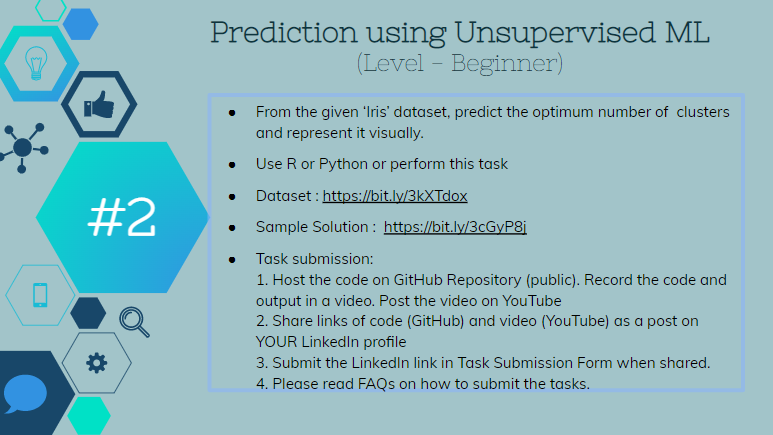

Importing dependencies and dataset

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

from pandas import DataFrame as df

In [2]:
#import iris flower data
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
#store dataset as dataframe
iris_df = df(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#For clustering data of petals, droping sepal colams
iris_petal = iris_df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
iris_petal

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'petal width (cm)')

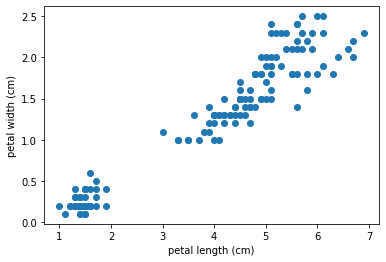

In [5]:
#ploting scatterplot with petal length and petal width
plt.scatter(iris_petal['petal length (cm)'], iris_petal['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [6]:
#for elbow graph
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_petal[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

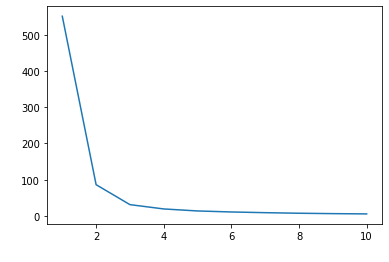

In [7]:
#plotting enbow graph
plt.xlabel('K', color='white')
plt.ylabel('Sum of Squared Error', color='white')
plt.plot(k_rng, sse)

In [8]:
#finding the clusters according to the data using k-means
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(iris_petal[['petal length (cm)', 'petal width (cm)']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [9]:
#creating a column in dataframe to see the clusters
iris_petal['Cluster'] = y_pred
iris_petal.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [10]:
#cluster cetroieds
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

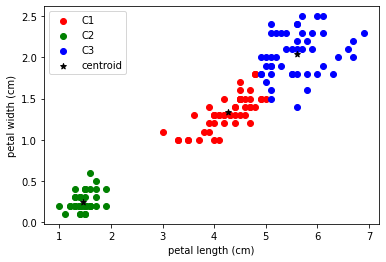

In [11]:
#ploting the clustered data with centroides
iris_p0 = iris_petal[iris_petal.Cluster==0]
iris_p1 = iris_petal[iris_petal.Cluster==1]
iris_p2 = iris_petal[iris_petal.Cluster==2]

plt.scatter(iris_p0['petal length (cm)'], iris_p0['petal width (cm)'], color='red', label='C1')
plt.scatter(iris_p1['petal length (cm)'], iris_p1['petal width (cm)'], color='green', label='C2')
plt.scatter(iris_p2['petal length (cm)'], iris_p2['petal width (cm)'], color='blue', label='C3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

*Here in the upper plot we can see that the clusters does not showing exact representation so we need to reconsider the data and manipulate it for better result*

In [19]:
#transforming the dataset uning sklearn preprocessing tools
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(iris_petal[['petal length (cm)']])
iris_petal['petal length (cm)'] = scaler.transform(iris_petal[['petal length (cm)']])

scaler.fit(iris_petal[['petal width (cm)']])
iris_petal['petal width (cm)'] = scaler.transform(iris_petal[['petal width (cm)']])
iris_petal.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


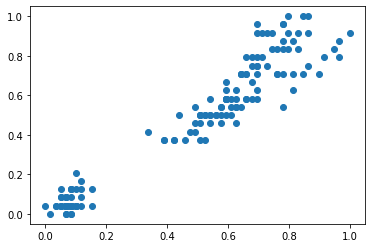

In [13]:
#ploting transformed data
plt.scatter(iris_petal['petal length (cm)'], iris_petal['petal width (cm)'])

In [14]:
#preparing the model for training and ploting elbow graph
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_petal[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

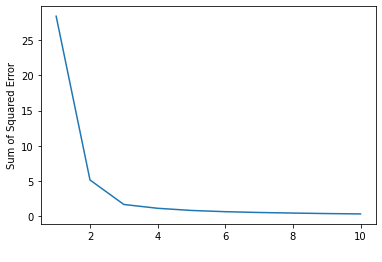

In [15]:
plt.xlabel('K', color='white')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

In [16]:
#from elbow graph we got clusters according the data
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(iris_petal[['petal length (cm)', 'petal width (cm)']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [17]:
#adding clusters to the dataframe as column
iris_petal['Cluster'] = y_pred
iris_petal.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


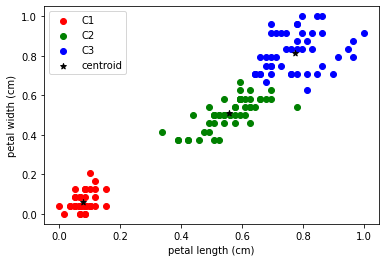

In [18]:
#ploting the data according to clusters with centroids
iris_p0 = iris_petal[iris_petal.Cluster==0]
iris_p1 = iris_petal[iris_petal.Cluster==1]
iris_p2 = iris_petal[iris_petal.Cluster==2]

plt.scatter(iris_p0['petal length (cm)'], iris_p0['petal width (cm)'], color='red', label='C1')
plt.scatter(iris_p1['petal length (cm)'], iris_p1['petal width (cm)'], color='green', label='C2')
plt.scatter(iris_p2['petal length (cm)'], iris_p2['petal width (cm)'], color='blue', label='C3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()